#### Connect the MySQL database ####

In [11]:
import mysql.connector
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt

In [12]:
connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='@America155088',
            database='PPT'
            )

In [13]:
query = """ SELECT * FROM posts_details"""
df = pd.read_sql(query, connection)

/var/folders/xp/1gy0dsh531s017q00bdzwmgw0000gn/T/ipykernel_28817/2071830198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [14]:
df.dropna(inplace=True)

In [63]:
df

,id,title,author,date,content,comments,category
0,1,[新聞] 士林夜市大腸包小腸徵店長 「月薪8萬+業2,ujmrfv (UUU),Sun May 5 17:34:11 2024,備註請放最後面 違者新聞文章刪除1.媒體來源: 三立新聞網2.記者署名: 陳佳鈴3.完整新聞...,好了啦/八萬不夠可以十萬啊/利潤居然高成這樣/未看先猜雙頭班 沒人搭班 月休4天/老闆賺的是...,Gossiping
1,2,[問卦] 高雄捷運為什麼車廂這麼少捷運站又熱？,lionelteng (LIN),Sun May 5 17:35:30 2024,我在搭高雄捷運啦，想說體會一下進步城市的大眾運輸工具結果一進到捷運站線就被熱到噴汗台灣不缺電...,,Gossiping
2,3,[問卦] 幾歲發現自己是包莖ㄉ,Himiko9975 (シー・ツー),Sun May 5 17:34:35 2024,各位八卦使用者們晚安啊我是那個在公園研究下一餐的小妹啦><各位或多或少都有聽過身邊的人是包莖...,,Gossiping
3,4,[問卦] 這帽子叫什麼名字？共匪帽？,MJdavid (膽固醇歐吉桑),Sun May 5 17:34:24 2024,剛剛看到板上的新聞[新聞] 金正恩新歌打敗泰勒絲點閱破百萬 Z世代狂狂讚：聽了會上癮影片有個...,,Gossiping
4,5,[新聞] 落選立委後接衛福部政次 林靜儀昔日「驚,super5566go (中共同路人+1),Sun May 5 17:35:49 2024,落選立委後接衛福部政次 林靜儀昔日「驚句」一次看！今日新聞／記者陳佩君／台北報導新內閣各部會...,,Gossiping
...,...,...,...,...,...,...,...
6801,6803,[Vtub] VEE Official 時間表 2024-05-05,lingsk (補眠中...),Sun May 5 01:38:57 2024,VituralEntertainment VEE公式サイト 成員 VEE 商店 時間表(公 ...,感謝整理!,C_Chat
6802,6804,[新聞] 《鐵達尼號》船長今晨逝世！享壽79歲 經,admeta (陽明山),Sun May 5 23:41:30 2024,SETN《鐵達尼號》船長今晨逝世！享壽79歲 經紀人證實娛樂中心／林奇樺報導英國演員伯納希爾...,叫女人跟小孩先上船那個第一女拳仔?/原來船長有活下來/我還以為船長早就跟船共存亡了/噫，不是...,Gossiping
6803,6805,[問卦] 用過3.5磁片跟5.25磁片的都幾歲了阿？,HDSM (Love Not Change O'_'O),Sun May 5 23:39:39 2024,安安大給賀阿!!!是降的啦本肥想問問說阿應該很多肥宅從小就有用過電腦了啦那用過3.5磁片跟5...,40+/問五樓/5.25磁片防寫入要拿貼紙貼起來/樓上== 我還真不知道要撕貼紙/28/用大...,Gossiping
6804,6806,Re: [問卦] 黑熊部隊和海豹部隊誰比較強？,pashow (英雄英雄 膽小的狗！),Sun May 5 23:23:23 2024,"['※ 引述《kimo21801》之銘言\n', ': 黑熊部隊，訓練個人射擊技巧、戰技、急...",/這時候推文會有 哈 急了 的圖嗎//人家戰力有五不錯了/要付錢的不能問嗎？而且價格也不低，...,Gossiping


#### Sentiment Analysis

In [134]:
from keybert import KeyBERT

In [135]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df['content'][0])
keywords

[('只是有一次洗的時候阿肥隔壁的眼睛仔眼鏡放在池子邊洗一洗一不小心掉下去之後他就趴在池上用手下去撈眼鏡另一隻手拿者臉盆擋住屁股嘴裡喊著要我別肛他操',
  0.7071),
 ('阿肥我在成功嶺的時候有洗過大澡堂', 0.5592),
 ('之銘言', 0.4891),
 ('有沒有八卦', 0.4491),
 ('聽說以前當兵都是一起洗澡是真的嗎', 0.4413)]

In [14]:
def clean_text(text):
    text = re.sub(r"[^\u4e00-\u9fff\d.a-zA-Z%+\-。！？，、；：（ 【】《》“”‘’]", '', text)  # 去除特殊字符
    return text

#### Content summarize

Ckiptagger website: https://github.com/ckiplab/ckiptagger/wiki/Chinese-README

In [5]:
import ckiptagger

In [6]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [21]:
#data_utils.download_data_gdown("./ckiptagger_data")

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=3e9a7ffe-bd05-4fc6-920a-8b5dfb058aac
To: /Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/ckiptagger_data/data.zip
100%|██████████| 1.88G/1.88G [00:58<00:00, 32.2MB/s]


In [7]:
ws = WS("./ckiptagger_data/data")
pos = POS("./ckiptagger_data/data")
ner = NER("./ckiptagger_data/data")

/Users/kevinhsu/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-05-03 15:06:33.596769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 15:06:33.596811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-03 15:06:33.614926: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2024-05-03 15:06:33.692236: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-03 15:06:33.702760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-03 15:06:34.151879: I tensorflow/core/grappler/optimizers/custom_graph_

In [16]:
word_to_weight = {
    "鄉民": 1,
    '據了解':1,
    '不夠':1,
}

In [ ]:
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

In [17]:
sentence_list = [df['content'][1]]

In [18]:
clean_text(sentence_list[0])

'我在搭高雄捷運啦，想說體會一下進步城市的大眾運輸工具結果一進到捷運站線就被熱到噴汗台灣不缺電，那為什麼連一點空調都捨不得開？高雄很熱誒然後看一堆車門都掛上鏈子，代表車廂沒這麼多我就覺得奇怪，為什麼不多掛一些車廂？有這方面八卦嗎？--'

In [16]:
word_sentence_list = ws(
        sentence_list,
        sentence_segmentation = True, # To consider delimiters 分隔符號
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimit$
        #recommend_dictionary = dictionary1, # words in this dictionary are encouraged 鼓勵，支援
        coerce_dictionary = dictionary, # words in this dictionary are forced 強制
    )

2024-05-03 15:06:58.685594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [34]:
print(word_sentence_list[0])

['欸', '欸', '最近', '八', '年', '來', '，', '股市', '一直', '破', '新高', '這', '八', '年', '，', '鄉民', '都', '有', '賺到', '錢', '吧', '？', '一定', '有', '賺到', '錢', '吧', '？', '有', '沒', '有', '這', '方面', '的', '八卦', '？', '--']


In [62]:
sentence_list = [df['content'][5]]
sentence_list

["['※ 引述《admeta (陽明山)》之銘言：', ': 三立', ': 快訊／遺體找到了！打賭1000元游到對岸\\u3000男高職生溺水喪命', ': 記者楊忠翰／新北報導', ': 新北市永和區驚傳溺水案件，15日晚間時分，4名高職生前往綠光河岸公園，其中3人打賭', ': 游到對岸，並以1千元為籌碼，2人上岸後先行返回宿舍，另名男同學卻遲未現身，2人返', ': 回河濱公園尋找，卻只發現男同學隨身物品，只好趕緊打電話報案，警消歷經1日搜救，', ': 終於尋獲該名男同學，但他已經明顯死亡。', ': 據了解，25日晚間9時許，同為22歲的緬甸籍板姓、黃姓及坤姓男學生，與19歲的徐姓女', ': 同學，一同購買啤酒、滷味到綠光河岸公園聊天，徐女感到疲累先行返回宿舍，黃男及坤', ': 男則向板男表示：「如果你從這游過去，就給你1千元」，接著2人跳入水中，從永和端游', ': 至北市端上岸。', ': 黃男、坤男上岸後步行離去，但2人回到宿舍多時，卻一直沒看到板男出現，2人急忙跑回', ': 河濱公園，只找到板男衣物及手機，2人在附近尋找未果，急忙打電話通知校方並報案。', ': 16日凌晨時分，警消獲報後下艇搜救，直到17日上午11時38分才尋獲板男，但他早已明顯', ': 死亡，警消已將遺體打撈上岸，目前正在等待學校教官前來認屍。', ':', '', ': ▲新北市消防局稍早尋獲緬甸籍板姓男學生遺體。'] 安安你好~我是蕉哥身為一個多年救生經驗、在溪邊海邊救過數十人的救生員，有些經驗想跟大家分享。---喝酒下水、年輕人愛打賭、做出超過自己能力範圍的事情，非常明顯就是這次意外發生的主因。根據我在海邊救生的經驗，多數被救上岸的溺者也都表示自己「會游泳」，不過依然發生了溺水意外。而網路上也常常流傳著一句話─善泳者溺。這句話，真的有其道理嗎？** 網誌好讀版： ///▍會溺水的人都是會游泳的人？在台灣，游泳能力早已被列為學校的畢業門檻之一。但這樣的制度施行之後，是否就代表所有從學校畢業的人，都屬於會游泳的人？顯然事實並非如此。台灣的游泳門檻過低，導致許多人都以為自己「會游泳」；台灣的家長也以為送孩子去上游泳課，就等於有能力在開放水域戲水。這樣的認知完全是錯誤的！事實上，多數人上完游泳課後都具備基本的游泳能力，只是必須滿足穿著泳裝、戴蛙鏡、在腳能夠觸地的有泳池

In [20]:
import jieba

In [21]:
merge_str = df[df['title'].str.contains('問卦')]['content'].apply(str)

In [22]:
match = ' '.join(merge_str)

In [23]:
res = str(re.findall(r'[\da-zA-Z\u4e00-\u9fff]+', match))

In [50]:
word_count = {}
str_list = jieba.cut(res)
for i in str_list:
    if i in word_count:
        word_count[i] +=1
    else:
        word_count[i] = 1

In [49]:
del_words_path ='/Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/delete.txt'
del_words_list = []

In [57]:
with open(del_words_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        del_words_list.append(line)

In [58]:
del_result = []
for i in del_words_list:
    del_result.append(i.replace('\n', ''))

In [53]:
keys_to_remove = [key for key, value in word_count.items() if len(key) == 1]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

In [59]:
keys_to_remove = [key for key, value in word_count.items() if key in del_result]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

In [60]:
keys_to_remove = [key for key, value in word_count.items() if len(key) < 3]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

### WordCloud

In [30]:
from wordcloud import WordCloud
from collections import Counter

In [31]:
font = "/Users/kevinhsu/Downloads/SourceHanSansTW-Regular.otf"

In [32]:
Wcloud = WordCloud(background_color='white', font_path=font)

In [61]:
Wcloud.generate_from_frequencies(word_count)

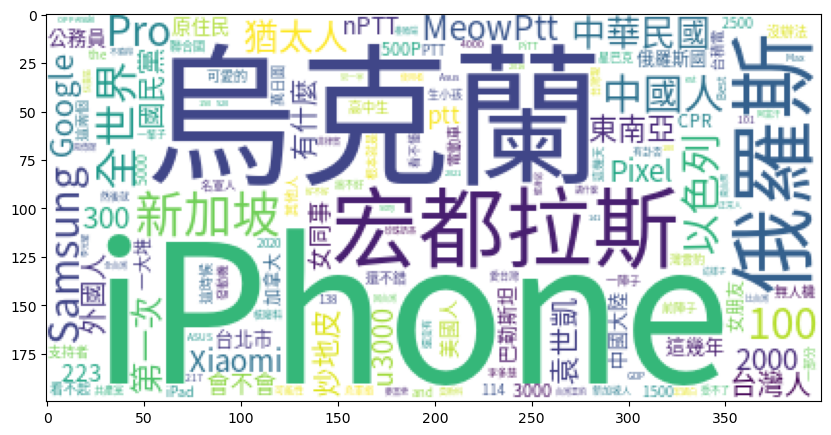

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(Wcloud)
plt.show()